In [ ]:
!pip install ultralytics

In [ ]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5
!pip freeze > requirements.txt

In [ ]:
import torch

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images
img = "/content/ROAD 2.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print()

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use

In [ ]:
print(results)

image 1/1: 512x768 14 cars, 7 buss, 2 trucks
Speed: 64.8ms pre-process, 505.4ms inference, 40.2ms NMS per image at shape (1, 3, 448, 640)


Saved 1 image to runs/detect/exp


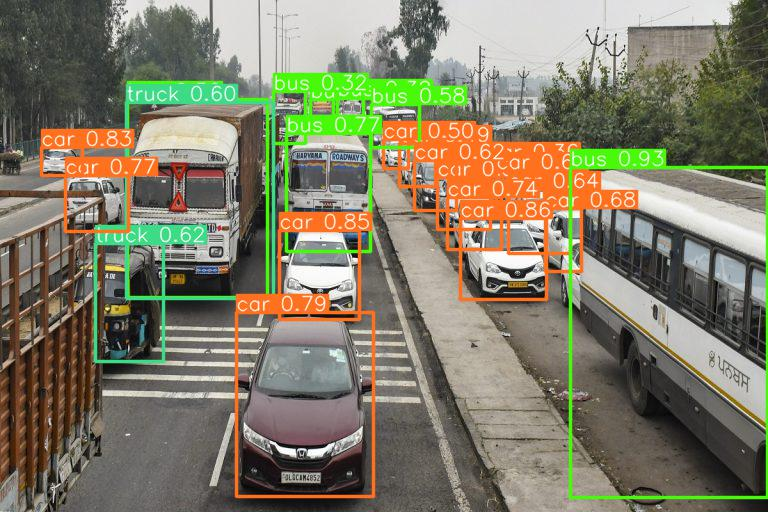

image 1/1: 512x768 14 cars, 7 buss, 2 trucks
Speed: 27.4ms pre-process, 527.6ms inference, 2.2ms NMS per image at shape (1, 3, 448, 640)


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
results = model(img)

# Results
results.save()
img1 = cv2.imread('runs/detect/exp/ROAD 2.jpg')
cv2_imshow(img1)
print(results)

In [ ]:
OP_OBJS =str(results)
print(OP_OBJS)

image 1/1: 512x768 14 cars, 7 buss, 2 trucks
Speed: 27.4ms pre-process, 527.6ms inference, 2.2ms NMS per image at shape (1, 3, 448, 640)


In [ ]:
def remove_after_second_line(input_string):
    lines = input_string.split('\n')
    if len(lines) <= 1:
        return input_string
    else:
        return '\n'.join(lines[:1])
def remove_before_first_obj(results):
  lines = results.split(' ')


  if len(lines) <= 3:
        return ""
  else:
      return '\n'.join(lines[3:])


def decorate_objs(obj_list):
  for i in obj_list:
    print("*")
import re
def separate_numbers_and_categories(input_string):

    numbers = []
    categories = []
    table_obj = []

    # Use regular expression to find numbers and categories
    pattern = r'(\d+)\s+(\w+)'
    matches = re.findall(pattern, input_string)

    for match in matches:
        number, category = match
        numbers.append(int(number))
        categories.append(category)
    table_obj.append(categories)
    table_obj.append(numbers)
    return table_obj

# Example usage:
input_string = str(OP_OBJS)
result = remove_after_second_line(input_string)
obj_list = remove_before_first_obj(result)
input_string = obj_list
# Call the function to separate numbers and categories
table_obj = separate_numbers_and_categories(input_string)

import pandas as pd
table_obj = pd.DataFrame(table_obj)
df = pd.DataFrame(table_obj)

# Transpose rows to columns using transpose() method
obj_colm = df.transpose().rename(columns={0: "Category", 1: "Value"})

# Print the results
obj_colm.head()




,Category,Value
0,cars,14
1,buss,7
2,trucks,2


In [ ]:
import re

def create_list_with_values(input_string):
    categories_values = {}

    # Use regular expression to find categories and their values
    pattern = r'(\w+)\s+([\d.]+)'
    matches = re.findall(pattern, input_string)

    for match in matches:
        category, value = match
        categories_values[category] = float(value)

    # Convert the dictionary to a list of tuples
    prob_list = list(categories_values.items())

    return prob_list

# Given input string
input_string = "buss 0.02455, cars 0.16, cycles 0.256, trucks 0.637, motorcycles 0.446, autorickshaw 0.0455, e-rickshaw 0.128, stopsign 0.0109,trafficlight 0.0208, potholes 0.0088"
# Call the function to create the list with categories and values
prob_list = create_list_with_values(input_string)

# Print the result
prob_dict = dict(prob_list)
print(prob_dict)


{'buss': 0.02455, 'cars': 0.16, 'cycles': 0.256, 'trucks': 0.637, 'motorcycles': 0.446, 'autorickshaw': 0.0455, 'rickshaw': 0.128, 'stopsign': 0.0109, 'trafficlight': 0.0208, 'potholes': 0.0088}


In [ ]:
obj_colm.head()

,Category,Value
0,cars,14
1,buss,7
2,trucks,2


In [ ]:
def calculate_divided_sum(obj_colm, prob_dict):
  sum=0
  den=0
  for index, row in obj_colm.iterrows():
      category = row['Category']
      value = row['Value']

      try:
        sum += value * prob_dict[category]
        den += value
      except:
        pass

  if(den==0):
    return "No match found"

  return sum/den

In [ ]:
calculate_divided_sum(obj_colm, prob_dict)

0.16